In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from statsmodels.formula.api import logit
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics

# Setting Data Up

In [2]:
regression_data = pd.read_csv("../output_data/seth/sub_level_data.csv")
regression_data['log_subscribers'] = np.log(regression_data.subscribers_1 + 2)
regression_data['age_and_subs'] = regression_data.log_subscribers * regression_data.age_in_months
regression_data

,communityID,added,changed,deleted,unchanged,subscribers_1,subscribers_2,rules_1,rules_2,timestamp_1,timestamp_2,founding_date,age_in_months,log_subscribers,age_and_subs
0,007_link,0.0,0.0,0.0,1.0,7,7,1,1,1.627687e+09,1.644941e+09,1.579930e+09,14.908671,2.197225,32.757698
1,007nightfire,0.0,0.0,0.0,5.0,68,91,5,5,1.625925e+09,1.643361e+09,1.609863e+09,3.526107,4.248495,14.980651
2,00games,0.0,0.0,0.0,4.0,2,3,4,4,1.630524e+09,1.646246e+09,1.580752e+09,14.596170,1.386294,20.234588
3,00saesthetics,0.0,0.0,0.0,6.0,2836,2995,6,6,1.624697e+09,1.642362e+09,1.562924e+09,21.375357,7.950855,169.952359
4,00sbabies,0.0,0.0,0.0,6.0,300,298,6,6,1.625180e+09,1.642880e+09,1.595696e+09,8.913409,5.710427,50.899370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130846,zyramains,0.0,0.0,0.0,9.0,10085,11382,9,9,1.624172e+09,1.642224e+09,1.419736e+09,75.824785,9.219003,699.028897
130847,zyxcomments,0.0,0.0,0.0,1.0,8,8,1,1,1.627579e+09,1.644794e+09,1.562897e+09,21.385681,2.302585,49.242349
130848,zyzz,1.0,0.0,1.0,1.0,7245,11991,2,2,1.624310e+09,1.642229e+09,1.311994e+09,116.795459,8.888343,1038.118088
130849,zztails,0.0,0.0,0.0,2.0,137,142,2,2,1.625469e+09,1.643165e+09,1.546838e+09,27.492575,4.934474,135.661394


In [3]:
regression_data['added_1'] = np.where(regression_data.added > 0, 1, 0)

In [4]:
regression_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Regression

## Subscribers

In [5]:
X = np.array(regression_data.log_subscribers)
y = np.array(regression_data.added_1)

# Split the data into training and testing sets with a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# logistic regression
reg = LogisticRegression().fit(X_train.reshape(-1, 1), y_train)
predictions = reg.predict(X_test.reshape(-1, 1))
score = reg.score(X_test.reshape(-1, 1), y_test)
print(f'accuracy: {score}')
print(f'precision: {metrics.precision_score(y_test, predictions)}')
print(f'recall: {metrics.recall_score(y_test, predictions)}')
print(f'f1: {metrics.f1_score(y_test, predictions)}')

accuracy: 0.9502751171795394
precision: 0.17777777777777778
recall: 0.004160166406656267
f1: 0.008130081300813009


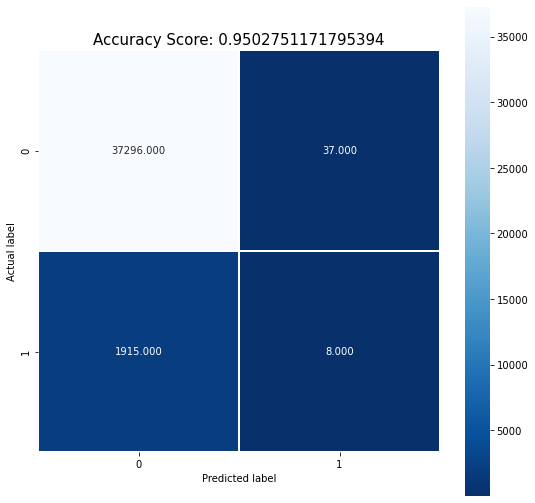

In [6]:
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

## Age

In [7]:
X = np.array(regression_data.age_in_months + 2)
y = np.array(regression_data.added_1)

# Split the data into training and testing sets with a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# logistic regression
reg = LogisticRegression().fit(X_train.reshape(-1, 1), y_train)
predictions = reg.predict(X_test.reshape(-1, 1))
score = reg.score(X_test.reshape(-1, 1), y_test)
print(f'accuracy: {score}')
print(f'precision: {metrics.precision_score(y_test, predictions)}')
print(f'recall: {metrics.recall_score(y_test, predictions)}')
print(f'f1: {metrics.f1_score(y_test, predictions)}')

accuracy: 0.9498930099857347
precision: 0.0
recall: 0.0
f1: 0.0


C:\Users\nammy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


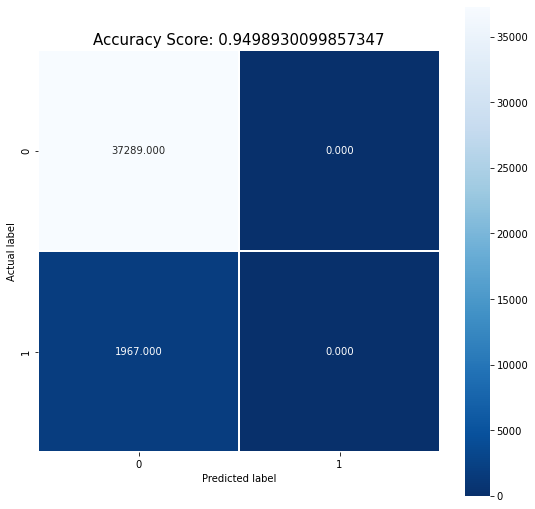

In [8]:
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

# Age and Subscribers

In [9]:
X = regression_data[['age_in_months', 'log_subscribers', 'subscribers_1', 'age_and_subs']].values.astype(np.ndarray)
y = np.array(regression_data.added_1)

In [10]:

# Split the data into training and testing sets with a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# logistic regression
reg = LogisticRegression().fit(X_train, y_train)
predictions = reg.predict(X_test)
score = reg.score(X_test, y_test)
print(f'accuracy: {score}')
print(f'precision: {metrics.precision_score(y_test, predictions)}')
print(f'recall: {metrics.recall_score(y_test, predictions)}')
print(f'f1: {metrics.f1_score(y_test, predictions)}')

accuracy: 0.945995516608926
precision: 0.2879581151832461
recall: 0.056179775280898875
f1: 0.09401709401709402


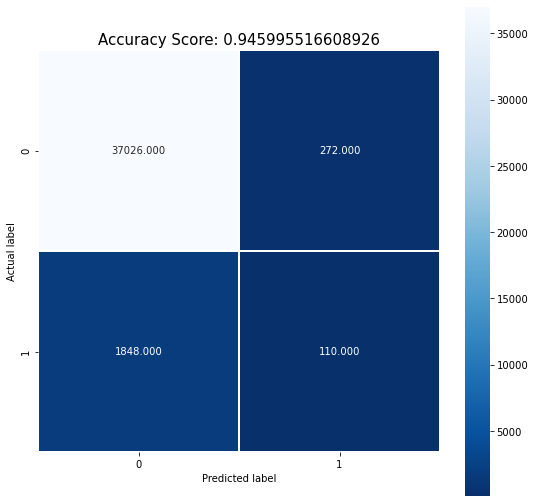

In [11]:
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

# Regression Comparisons

In [6]:
m01 = logit('added_1 ~ subscribers_2 + log_subscribers + age_in_months + age_and_subs', data=regression_data).fit()
print(m01.summary())

Optimization terminated successfully.
         Current function value: 0.163475
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                added_1   No. Observations:               130851
Model:                          Logit   Df Residuals:                   130846
Method:                           MLE   Df Model:                            4
Date:                Sun, 07 May 2023   Pseudo R-squ.:                  0.1693
Time:                        14:41:04   Log-Likelihood:                -21391.
converged:                       True   LL-Null:                       -25750.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -5.8005      0.060    -96.901      0.000      -5.918      -5.683
subscribers_2 

In [7]:
m02 = logit('added_1 ~ subscribers_2', data=regression_data).fit()
print(m02.summary())

Optimization terminated successfully.
         Current function value: 0.196221
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                added_1   No. Observations:               130851
Model:                          Logit   Df Residuals:                   130849
Method:                           MLE   Df Model:                            1
Date:                Sun, 07 May 2023   Pseudo R-squ.:                0.002889
Time:                        14:41:04   Log-Likelihood:                -25676.
converged:                       True   LL-Null:                       -25750.
Covariance Type:            nonrobust   LLR p-value:                 3.204e-34
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -2.9656      0.013   -231.594      0.000      -2.991      -2.940
subscribers_2  1.847

In [8]:
m03 = logit('added_1 ~ log_subscribers', data=regression_data).fit()
print(m03.summary())

Optimization terminated successfully.
         Current function value: 0.163996
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                added_1   No. Observations:               130851
Model:                          Logit   Df Residuals:                   130849
Method:                           MLE   Df Model:                            1
Date:                Sun, 07 May 2023   Pseudo R-squ.:                  0.1666
Time:                        14:41:05   Log-Likelihood:                -21459.
converged:                       True   LL-Null:                       -25750.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -5.4685      0.038   -142.689      0.000      -5.544      -5.393
log_subscriber

In [9]:
m04 = logit('added_1 ~ age_in_months', data=regression_data).fit()
print(m04.summary())

Optimization terminated successfully.
         Current function value: 0.187135
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                added_1   No. Observations:               130851
Model:                          Logit   Df Residuals:                   130849
Method:                           MLE   Df Model:                            1
Date:                Sun, 07 May 2023   Pseudo R-squ.:                 0.04906
Time:                        14:41:05   Log-Likelihood:                -24487.
converged:                       True   LL-Null:                       -25750.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -3.6417      0.021   -176.479      0.000      -3.682      -3.601
age_in_months     0.

In [10]:
m05 = logit('added_1 ~ age_and_subs', data=regression_data).fit()
print(m05.summary())

Optimization terminated successfully.
         Current function value: 0.180452
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                added_1   No. Observations:               130851
Model:                          Logit   Df Residuals:                   130849
Method:                           MLE   Df Model:                            1
Date:                Sun, 07 May 2023   Pseudo R-squ.:                 0.08302
Time:                        14:41:06   Log-Likelihood:                -23612.
converged:                       True   LL-Null:                       -25750.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -3.5650      0.018   -199.881      0.000      -3.600      -3.530
age_and_subs     0.0017

In [11]:
m06 = logit('added_1 ~ log_subscribers + age_in_months', data=regression_data).fit()
print(m06.summary())

Optimization terminated successfully.
         Current function value: 0.163953
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                added_1   No. Observations:               130851
Model:                          Logit   Df Residuals:                   130848
Method:                           MLE   Df Model:                            2
Date:                Sun, 07 May 2023   Pseudo R-squ.:                  0.1669
Time:                        14:41:06   Log-Likelihood:                -21453.
converged:                       True   LL-Null:                       -25750.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -5.4790      0.039   -142.050      0.000      -5.555      -5.403
log_subscriber